initialized:
self.new_weight in change_weight: 5
self.faces in change_weight:    weights
0      1.0
1      1.0
2      1.0
3      5.0
4      1.0
5      1.0
weight changed:
self.faces_df type in create_die: <class 'pandas.core.frame.DataFrame'>
self.faces_df in create_die:    weights
0      1.0
1      1.0
2      1.0
3      5.0
4      1.0
5      1.0
n_sides in create_die: 6
self.faces_df.weights in create_die: 0    1.0
1    1.0
2    1.0
3    5.0
4    1.0
5    1.0
Name: weights, dtype: float64
my_probs in create_die: [0.1, 0.1, 0.1, 0.5, 0.1, 0.1]
sum (self.faces_df.weights) in create_die 10.0
die created:
this is the created die:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
show die state2:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
rolled die:
results:      0
0    1
1    5
2    2
3    4
4    4
..  ..
995  2
996  6
997  5
998  4
999  6

[1

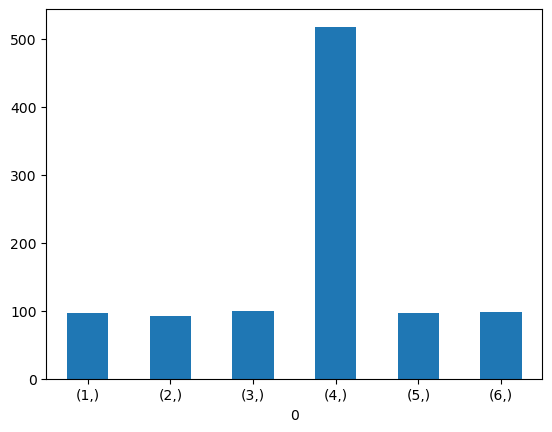

In [1]:
import numpy as np
import pandas as pd

class Die():
    '''General Definition
    A die has 𝑁 sides, or “faces”, and 𝑊 weights,
    and can be rolled to select a face.
    For example, a “die” with 𝑁=2 is a coin, and
    a one with 𝑁=6 is a standard die.
    Normally, dice and coins are “fair,” meaning that the
    each side has an equal weight.
    An unfair die is one where the weights are unequal.
    Each side contains a unique symbol.
    Symbols may be all alphabetic or all numeric.
    𝑊 defaults to 1.0 for each face
    but can be changed after the object is created.
    The weights are just positive numbers (integers or floats, including 0),
    not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Specific Methods and Attributes:
        1. An initializer
        2. Change the weight of a single side.
        3. Create die
        4. Roll die
        5. Show die's current state
    '''
    def __init__(self, faces):
        self.faces = faces
        ''' Takes a NumPy array of faces as an argument.'''

        # verify faces is type (np.ndarray); TypeError if not
        if not isinstance (self.faces, np.ndarray):
            raise TypeError('faces is not an np array')

        # Tests to see if the values are distinct; ValueError if not
        if len(self.faces) != len(set(self.faces)):    # 'set' values are unique
            raise ValueError('faces are not unique')
            # NOTE: faces = np.unique (faces) removes "redundant" values        

        # Internally initializes the weights to 1.0 for each face.
        self.weights = np.ones(len(self.faces))
#        weights = np.ones(len(self.faces))
        #print (faces, weights)

        # Saves both faces and weights in a private data frame
        #   with faces in the index.
        index_values = [self.faces]
        self.faces_df = pd.DataFrame({'weights': self.weights}, index=index_values)

    def change_weight (self, face_to_change, new_weight):
        '''Takes two arguments: the face value to be changed and the new weight.'''
#        self.face_to_change = face_to_change
        self.new_weight = new_weight

        # Checks to see if the face passed is valid value,
        #   i.e. if it is in the die array; IndexError if not
        if face_to_change not in self.faces_df.index:
#        if self.face_to_change not in self.faces_df.values:
            raise IndexError('face_to_change not in faces.df')

        # Checks to see if the weight is a valid type,
        #   i.e. if it is numeric (integer or float); TypeError if not
#        if not isinstance(self.new_weight, (int, float)):
        if not isinstance(self.new_weight, (int, float)):
            raise TypeError('new_weight is not valid type')
           
        # change face's weight
        # subtract 1 to change correct face due to Python offset
        self.faces_df.loc[face_to_change-1] = self.new_weight
        print ('self.new_weight in change_weight:', self.new_weight)
        print ('self.faces in change_weight:', self.faces_df)
        
    def create_die (self, faces_df):
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        print ('self.faces_df type in create_die:', type (self.faces_df))
        print ('self.faces_df in create_die:', self.faces_df)
#        self.faces_df = faces_df
        n_sides = len(self.faces_df.weights)
        print ('n_sides in create_die:', n_sides)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        print ('self.faces_df.weights in create_die:', self.faces_df.weights)
        print ('my_probs in create_die:', my_probs)
        print ('sum (self.faces_df.weights) in create_die', sum(self.faces_df.weights))
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        return self.die

    def roll_die (self, number_of_rolls):
        '''takes a parameter of how many times the die is to be rolled; defaults to 1.'''
#        self.number_of_rolls = number_of_rolls
        # print (self.die, '\nsum of weights:', sum(self.die.weights))
        # print ('number of rolls:', self.number_of_rolls)   

        # This is essentially a random sample with replacement,
        #   from the private die data frame, that applies the weights.
        results = []
        for i in range(number_of_rolls):
            result = self.die.side.sample(weights=self.die.weights, replace=True).values[0]
            results.append(result)
        self.result = pd.DataFrame(results)
        return (self.result)
        #return pd.Series(results)
        
    def show_die_state(self, die):
        '''A method to show the die’s current state.
        Returns a copy of the private die data frame.'''
        self.die = die
        die_deep = self.die.copy()
#        die_deep
        return die_deep
        
     def plot_results(self, my_results):
        '''Show the results of rolling the dice n times with a simple bar graph.'''
        my_results.value_counts().sort_index().plot.bar(rot=0);
        NARROW = pd.DataFrame(my_results).stack
        print ('NARROW:\n', NARROW)
        WIDE = pd.DataFrame(my_results).unstack()
        print ('my_results dimensions:', my_results.shape)
        print ('WIDE dimensions:', WIDE.shape)
        print ('WIDE:\n', WIDE)
#        #  Returns a copy of the private die data frame.

#






faces = np.arange (6)  # creates array
#facesvalue = np.array(faces)  # creates array
#print ('facesvalue type:', type(facesvalue))
#faces = facesvalue  # creates array
faces_df = Die(faces)
print ('initialized:')

faces_df.change_weight (4, 5)
print ('weight changed:')

die = faces_df.create_die (faces_df)    # create die with updated weights
#print ('die type:', type (die))
print ('die created:')
print ('this is the created die:\n', die)

#print ('show die state with method call:')
die_deep2 = faces_df.show_die_state (die)  # show die state
print ('show die state2:\n', die_deep2)

results = faces_df.roll_die(1000)   # roll die
print ('rolled die:') 
print ('results:', results)

results.value_counts()   # tally roll results
print ('results tally:\n', results.value_counts().sort_index())

faces_df.plot_results (results)   # plot roll results


In [10]:
#help (Die)